# Contents
## 01. Import Libraries and Data
## 02. Subsetting and Wrangling Time Series
## 03. Time Series Analysis: Decomposition
## 04. Testing for Stationarity
## 05. Stationarizing Data

# 01. Import Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

In [3]:
# Assign path to str
path = r'/Users/allyfornino/Documents/11-2022 Gun Violence Analysis/'

In [4]:
# Import clean data as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_gun_violence_data.csv'))

In [5]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,...,teen_participant,adult_participant,all_adults,all_female_participants,all_male_participants,mixed_gender_participants,all_victims,all_suspects,suspects_and_victims,n_participants
0,32,481229,2013-03-07,Mississippi,Jackson,2,2,32.2649,-90.2141,1.0,...,False,True,True,False,False,True,False,False,True,4
1,56,485746,2013-04-22,Louisiana,Harvey,0,5,29.8736,-90.0568,3.0,...,False,True,NaN,False,False,True,False,False,True,9
2,62,485979,2013-04-28,Tennessee,Jackson,2,2,35.6141,-88.8150,2.0,...,False,True,True,False,True,False,False,False,True,6
3,78,873575,2013-05-18,New York,Jamaica,1,0,40.6730,-73.7881,1.0,...,True,True,NaN,False,False,True,False,False,True,2
4,79,486611,2013-05-18,Virginia,Victoria,0,4,37.0177,-78.1562,1.0,...,False,True,True,False,True,False,False,False,True,5


In [6]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,stolen_gun_involved,...,teen_participant,adult_participant,all_adults,all_female_participants,all_male_participants,mixed_gender_participants,all_victims,all_suspects,suspects_and_victims,n_participants
0,481229,2013-03-07,Mississippi,Jackson,2,2,32.2649,-90.2141,1.0,Unknown,...,False,True,True,False,False,True,False,False,True,4
1,485746,2013-04-22,Louisiana,Harvey,0,5,29.8736,-90.0568,3.0,Unknown,...,False,True,NaN,False,False,True,False,False,True,9
2,485979,2013-04-28,Tennessee,Jackson,2,2,35.6141,-88.8150,2.0,Unknown,...,False,True,True,False,True,False,False,False,True,6
3,873575,2013-05-18,New York,Jamaica,1,0,40.6730,-73.7881,1.0,Unknown,...,True,True,NaN,False,False,True,False,False,True,2
4,486611,2013-05-18,Virginia,Victoria,0,4,37.0177,-78.1562,1.0,Unknown,...,False,True,True,False,True,False,False,False,True,5


# 02. Subsetting and Wrangling Time-Series

In [7]:
df['incident_id'] = df['incident_id'].astype(str)
df['incident_id'].dtype

dtype('O')

In [8]:
time_series = pd.pivot_table(df, index = 'date', values = ['n_injured', 'n_killed', 'n_guns_involved', 'n_participants', 'mass_shooting_flag', 'drive_by_flag', 'domestic_violence_flag', 'armed_robbery_flag', 'gang_involvement_flag', 'accidental_flag', 'self_inflicted_flag'], aggfunc = 'sum')
time_series.head()


,accidental_flag,armed_robbery_flag,domestic_violence_flag,drive_by_flag,gang_involvement_flag,mass_shooting_flag,n_guns_involved,n_injured,n_killed,n_participants,self_inflicted_flag
date,,,,,,,,,,,
2013-03-07,0,0,0,0,0,1,1.0,2,2,4,0
2013-04-22,0,0,0,0,1,1,3.0,5,0,9,0
2013-04-28,0,0,0,0,0,1,2.0,2,2,6,0
2013-05-18,0,0,0,1,2,1,2.0,4,1,7,0
2013-05-25,0,0,0,0,0,1,1.0,3,1,4,0


In [9]:
time_ser = pd.pivot_table(df, index = 'date', values = ['incident_id'], aggfunc = 'count')
time_ser.head()

,incident_id
date,
2013-03-07,1
2013-04-22,1
2013-04-28,1
2013-05-18,2
2013-05-25,1


In [10]:
data = pd.DataFrame(time_ser)
data.head()

,incident_id
date,
2013-03-07,1
2013-04-22,1
2013-04-28,1
2013-05-18,2
2013-05-25,1


In [11]:
data.rename(columns = {'incident_id':'n_incidents'}, inplace = True)
data.head()

,n_incidents
date,
2013-03-07,1
2013-04-22,1
2013-04-28,1
2013-05-18,2
2013-05-25,1


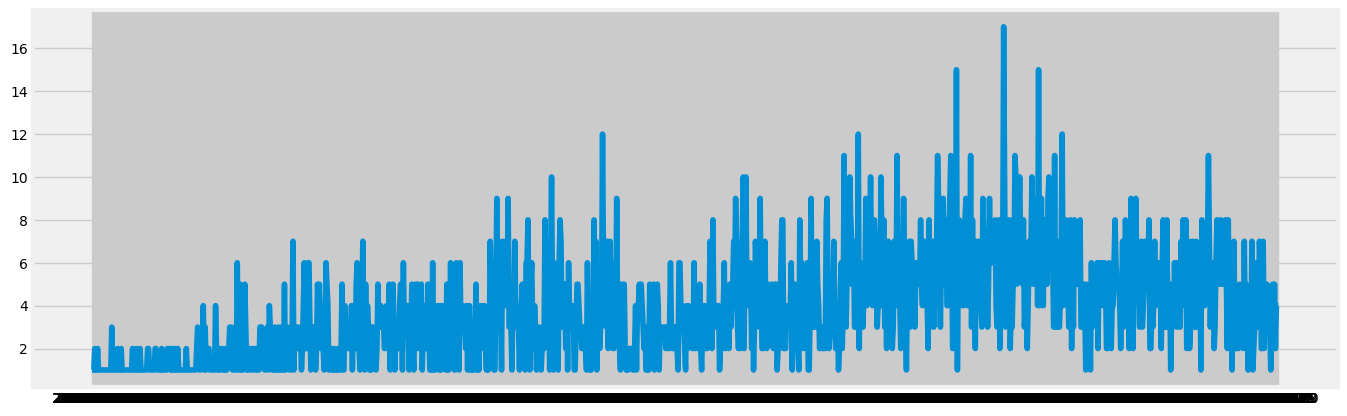

In [12]:
# Plot data
plt.figure(figsize = (15, 5), dpi = 100)
plt.plot(data)

In [13]:
data = data.reset_index()

In [14]:
data.head()

,date,n_incidents
0,2013-03-07,1
1,2013-04-22,1
2,2013-04-28,1
3,2013-05-18,2
4,2013-05-25,1


In [15]:
data.tail()

,date,n_incidents
1253,2018-03-24,5
1254,2018-03-25,2
1255,2018-03-28,4
1256,2018-03-29,4
1257,2018-03-30,4


In [16]:
data = data.loc[(data['date'] >= '2013-03-07') & (data['date'] < '2018-03-30')]

In [17]:
# Set date column as index
from datetime import datetime
data['datetime'] = pd.to_datetime(data['date'])
data = data.set_index('datetime').asfreq('d')
data.drop(['date'], axis = 1, inplace = True)
data.head()

,n_incidents
datetime,
2013-03-07,1.0
2013-03-08,NaN
2013-03-09,NaN
2013-03-10,NaN
2013-03-11,NaN


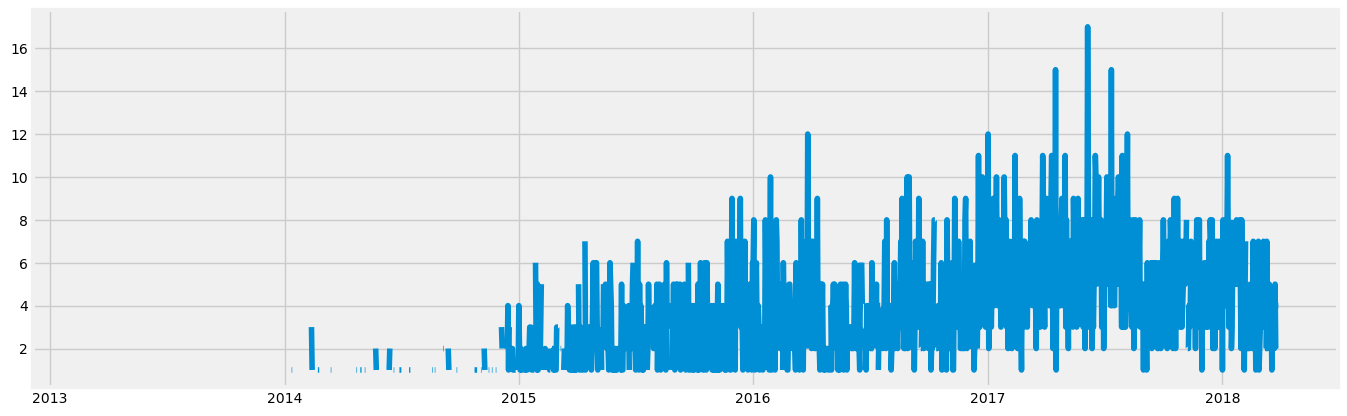

In [18]:
# Plot new data set
plt.figure(figsize = (15, 5), dpi = 100)
plt.plot(data)

In [19]:
# Check for missing values
data.isnull().sum()

n_incidents    592
dtype: int64

In [23]:
# Set all missing values to 0
data.fillna(0, inplace = True)
data.isnull().sum()

n_incidents    0
dtype: int64

# 03. Decomposition

In [24]:
# Decompose time series
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

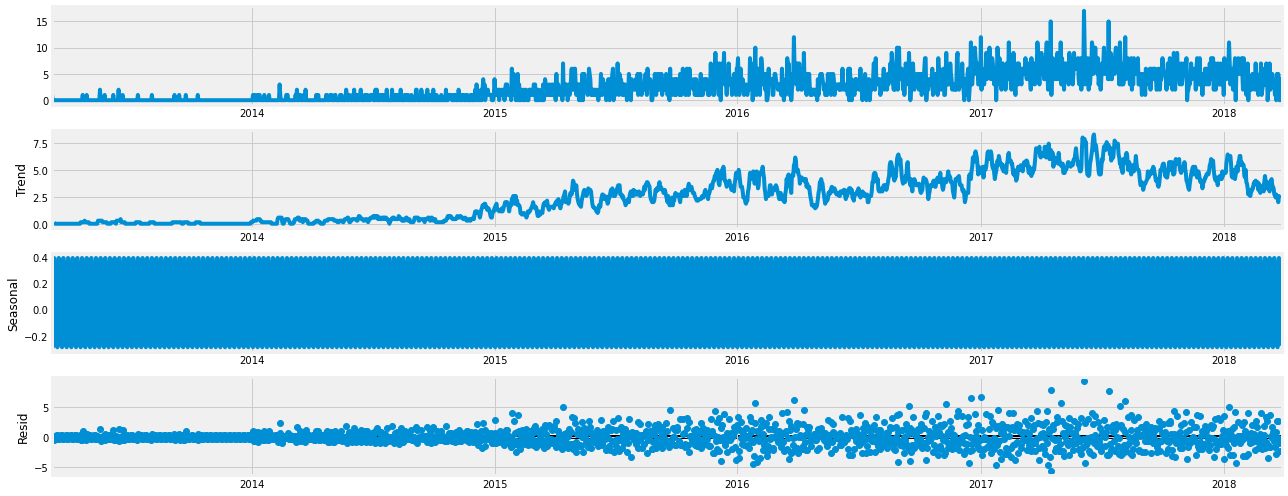

In [26]:
# Plot separate components
decomposition.plot()
plt.show()

#### Series needs smoothing, level and trend differ from each other and there is a lot of noise.

In [47]:
# Smoothing
data['mov_avg'] = data['n_incidents'].rolling(30).sum()

In [48]:
data_sub = data['mov_avg']
data_sub.head()

datetime
2013-03-07   NaN
2013-03-08   NaN
2013-03-09   NaN
2013-03-10   NaN
2013-03-11   NaN
Freq: D, Name: mov_avg, dtype: float64

In [49]:
data_sub.fillna(0, inplace = True)
data_sub.head()

datetime
2013-03-07    0.0
2013-03-08    0.0
2013-03-09    0.0
2013-03-10    0.0
2013-03-11    0.0
Freq: D, Name: mov_avg, dtype: float64

In [50]:
# Decompose time series
decomposition = sm.tsa.seasonal_decompose(data_sub, model = 'additive')

In [51]:
rcParams['figure.figsize'] = 18, 7

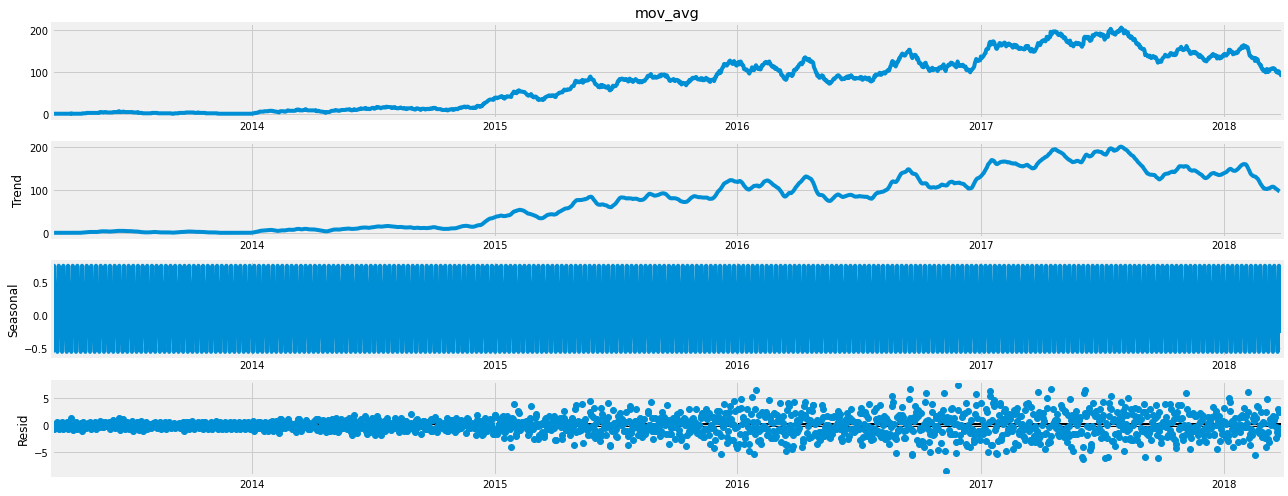

In [52]:
# Plot separate components
decomposition.plot()
plt.show()

#### When smoothing the time series with a moving average of 30 days, the trend and level are relatively the same and the amount of noise has been reduced.

# 04. Testing for Stationarity

In [57]:
data_ser = pd.DataFrame(data_sub)
data_ser.head()

,mov_avg
datetime,
2013-03-07,0.0
2013-03-08,0.0
2013-03-09,0.0
2013-03-10,0.0
2013-03-11,0.0


In [59]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    results = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        results['Critical Value (%s)'%key] = value
    print(results)

# Apply test
dickey_fuller(data_ser['mov_avg'])

Dickey-Fuller Stationarity Test:
Test Statistic                   -1.615839
p-value                           0.474911
Number of Lags Used              21.000000
Number of Observations Used    1827.000000
Critical Value (1%)              -3.433934
Critical Value (5%)              -2.863123
Critical Value (10%)             -2.567613
dtype: float64


#### Test statistic is larger than critical value at 5%, cannot reject null hypothesis. Series is non-stationary.

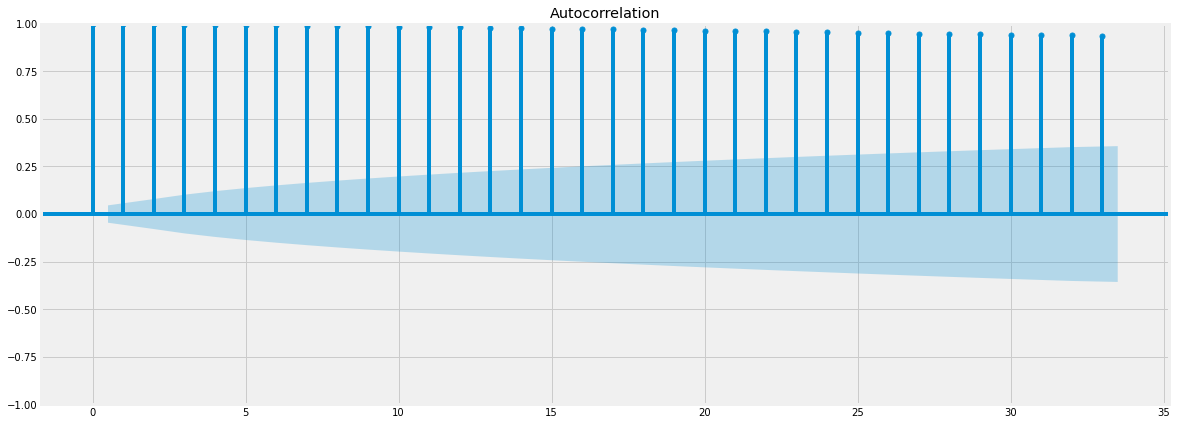

In [60]:
# Check plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_ser)
plt.show()

#### Plot shows a lot of autocorrelated data, supports result of Dickey-Fuller test that data is non-stationary.

# 05. Stationarizing Data

In [61]:
data_diff = data_sub - data_sub.shift(1)

In [62]:
data_diff.dropna(inplace = True)

In [63]:
data_diff.head()

datetime
2013-03-08    0.0
2013-03-09    0.0
2013-03-10    0.0
2013-03-11    0.0
2013-03-12    0.0
Freq: D, Name: mov_avg, dtype: float64

In [65]:
data_dif = pd.DataFrame(data_diff)
data_dif.head()

,mov_avg
datetime,
2013-03-08,0.0
2013-03-09,0.0
2013-03-10,0.0
2013-03-11,0.0
2013-03-12,0.0


In [66]:
data_dif.columns

Index(['mov_avg'], dtype='object')

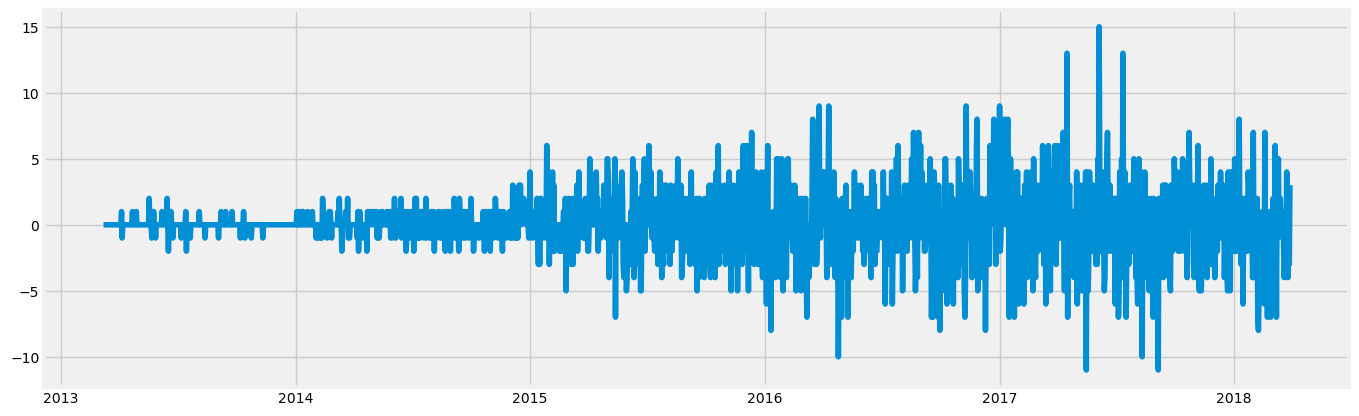

In [68]:
# Time-series curve with differencing
plt.figure(figsize = (15, 5), dpi = 100)
plt.plot(data_dif)

In [69]:
dickey_fuller(data_dif)

Dickey-Fuller Stationarity Test:
Test Statistic                -7.702905e+00
p-value                        1.324721e-11
Number of Lags Used            2.000000e+01
Number of Observations Used    1.827000e+03
Critical Value (1%)           -3.433934e+00
Critical Value (5%)           -2.863123e+00
Critical Value (10%)          -2.567613e+00
dtype: float64


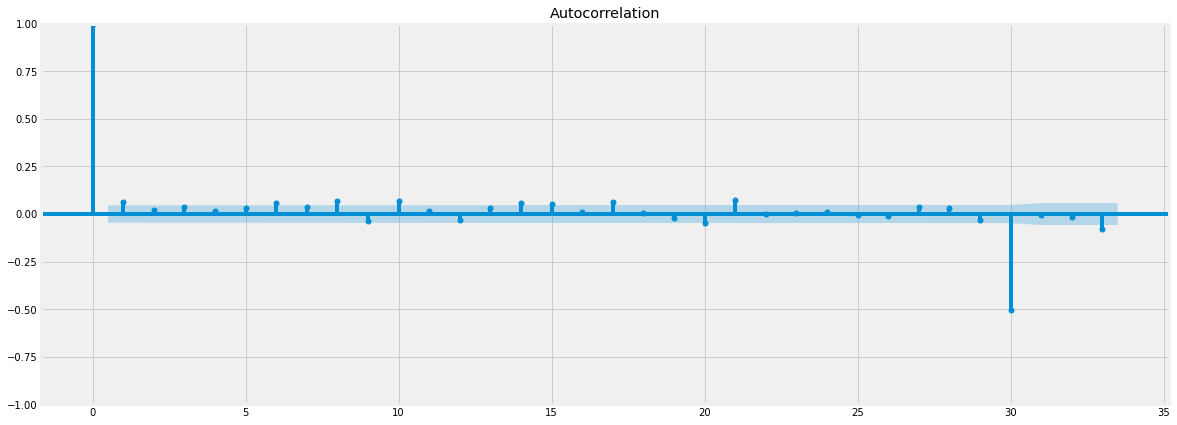

In [70]:
plot_acf(data_dif)
plt.show()

#### Differencing was successful, test statistic is smaller than critical value at 5% significance level and very few instances of autocorrelation. Series is now stationary.